## Try-out notebook for playing around with vectorization

In [1]:
import numpy as np

#### How to stretch np arrays so row wise mult will be possible

In [2]:
x = np.array([1, 2])
x = np.tile(x[:, np.newaxis], 3).ravel()
x

array([1, 1, 1, 2, 2, 2])

In [3]:
x = np.array([1,2])
x = np.repeat(x, 3)
x

array([1, 1, 1, 2, 2, 2])

### Fuzzification Layer

In [4]:
multiplicator = np.arange(3)
multiplicator = np.tile(np.arange(3), 2)
multiplicator

array([0, 1, 2, 0, 1, 2])

In [5]:
def center_init(x, n_mfs):
    """Initializes the centers of MFs by partitioning the domain of the features

    Args:
        x (numpy.ndarray): the max values for each feature, i.e. the domain
        n_mfs (int): number of MFs in Fuzzification Layer
        
    Returns: 
        numpy.ndarray: initalized widths with the shape (x.size,)
    """
    n_inputs = x.size // n_mfs
    multiplicator = np.tile(np.arange(1, n_mfs + 1), n_inputs)
    return (x / (n_mfs + 1)) * multiplicator

x = np.array([8,10])
x = np.repeat(x, 3)
print(type(x))
print(center_init(x, 3))
print(type(center_init(x, 3))) # numpy.ndarray'

<class 'numpy.ndarray'>
[2.  4.  6.  2.5 5.  7.5]
<class 'numpy.ndarray'>


In [6]:
def widths_init(x, n_mfs):
    """Initializes the widths of MFs by partitioning the domain of the features

    Args:
        x (numpy.ndarray): the max values for each feature, i.e. the feature's domain
        n_mfs (int): number of MFs in Fuzzification Layer

    Returns: 
        numpy.ndarray: initalized widths with the shape (x.size,)
    """
    return x/(n_mfs+1)

x = np.array([8,10])
x = np.repeat(x, 3)
print(x.size)
print(widths_init(x, 3))
print(widths_init(x, 3).shape)

6
[2.  2.  2.  2.5 2.5 2.5]
(6,)


In [7]:
def MF(x, center, width):
    return np.exp(-0.5*(((x-center)/width)**2))
    

In [8]:
x = np.array([1,2])
x = np.repeat(x, 3)

center = np.array([1, 2, 3, 4, 5, 6])# np.ones(3)
width = np.array([1, 2, 3, 4, 5, 6])

print(x)

MF(x, center, width)

[1 1 1 2 2 2]


array([1.        , 0.8824969 , 0.8007374 , 0.8824969 , 0.83527021,
       0.8007374 ])

### Rule Antecedent Layer


In [9]:
x = np.array([1,2,3,4,5,6])



x = np.array_split(x, range(3, len(x), 3))



x = np.meshgrid(*x) # the '*' unpacks x and passes to messgrid


#x = np.prod(x, axis=0)#.ravel()
print(x)
x.size

[array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]]), array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])]


AttributeError: 'list' object has no attribute 'size'

In [ ]:
from itertools import combinations
x = combinations(["a", "b", "c", 1,2,3], 2)
print(list(x))

[('a', 'b'), ('a', 'c'), ('a', 1), ('a', 2), ('a', 3), ('b', 'c'), ('b', 1), ('b', 2), ('b', 3), ('c', 1), ('c', 2), ('c', 3), (1, 2), (1, 3), (2, 3)]


In [45]:
import numpy as np

x = np.array([1,2,3,4,5,6, 7,8,9, 10, 11, 12])
#x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])


x = np.array_split(x, range(3, len(x), 3))


#print(x)
x = np.meshgrid(*x, indexing='ij') # the '*' unpacks x and passes to messgrid


x = np.prod(x, axis=0)#.ravel()
x

array([[[[ 280,  308,  336],
         [ 320,  352,  384],
         [ 360,  396,  432]],

        [[ 350,  385,  420],
         [ 400,  440,  480],
         [ 450,  495,  540]],

        [[ 420,  462,  504],
         [ 480,  528,  576],
         [ 540,  594,  648]]],


       [[[ 560,  616,  672],
         [ 640,  704,  768],
         [ 720,  792,  864]],

        [[ 700,  770,  840],
         [ 800,  880,  960],
         [ 900,  990, 1080]],

        [[ 840,  924, 1008],
         [ 960, 1056, 1152],
         [1080, 1188, 1296]]],


       [[[ 840,  924, 1008],
         [ 960, 1056, 1152],
         [1080, 1188, 1296]],

        [[1050, 1155, 1260],
         [1200, 1320, 1440],
         [1350, 1485, 1620]],

        [[1260, 1386, 1512],
         [1440, 1584, 1728],
         [1620, 1782, 1944]]]])

In [41]:
import numpy as np

x = np.array([1,2,3,4,5,6, 7,8,9, 10, 11, 12])
#x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])


x = np.array_split(x, range(3, len(x), 3))


#print(x)
x = np.meshgrid(*x, indexing='ij') # the '*' unpacks x and passes to messgrid


#x = np.prod(x, axis=0)#.ravel()
#print("HONK")
#print(x)
x = x[3]
print("start", x)

x = np.sum(x, axis=2) # or 1
#print("x", x)
print("1st")
print(x)
x = np.sum(x, axis=0)
print("2nd")
print(x)
x = np.sum(x, axis=0)
print("3rd")
print(x)
x


start [[[[10 11 12]
   [10 11 12]
   [10 11 12]]

  [[10 11 12]
   [10 11 12]
   [10 11 12]]

  [[10 11 12]
   [10 11 12]
   [10 11 12]]]


 [[[10 11 12]
   [10 11 12]
   [10 11 12]]

  [[10 11 12]
   [10 11 12]
   [10 11 12]]

  [[10 11 12]
   [10 11 12]
   [10 11 12]]]


 [[[10 11 12]
   [10 11 12]
   [10 11 12]]

  [[10 11 12]
   [10 11 12]
   [10 11 12]]

  [[10 11 12]
   [10 11 12]
   [10 11 12]]]]
1st
[[[30 33 36]
  [30 33 36]
  [30 33 36]]

 [[30 33 36]
  [30 33 36]
  [30 33 36]]

 [[30 33 36]
  [30 33 36]
  [30 33 36]]]
2nd
[[ 90  99 108]
 [ 90  99 108]
 [ 90  99 108]]
3rd
[270 297 324]


array([270, 297, 324])

In [ ]:
[[[21 21 21]
  [24 24 24]
  [27 27 27]]

[array([1, 2, 3]), array([4, 5, 6])]
[array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]]), array([[4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])]


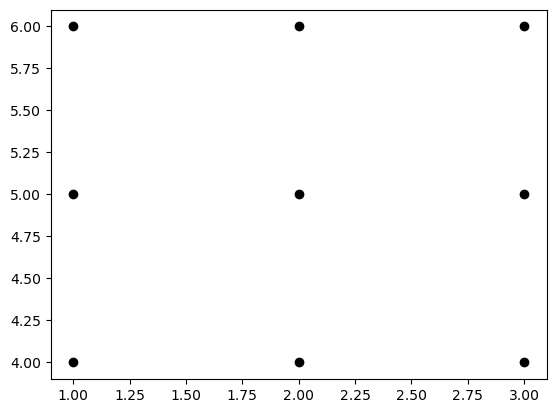

In [17]:
import matplotlib.pyplot as plt
#x = np.array([1,2,3,4,5,6, 7,8,9, 10, 11, 12])
x = np.array([1,2,3,4,5,6])


x = np.array_split(x, range(3, len(x), 3))


print(x)
x = np.meshgrid(*x, indexing='ij') # the '*' unpacks x and passes to messgrid


#x = np.prod(x, axis=0)#.ravel()
print(x)

plt.plot(x[0], x[1], marker='o', color='k', linestyle='none')
plt.show()

In [18]:

x = np.array([1,2,3,4,5,6])


x = np.array_split(x, range(3, len(x), 3))

def tryout(*xi):
    ndim = len(xi)



    s0 = (1,) * ndim
    output = [np.asanyarray(x).reshape(s0[:i] + (-1,) + s0[i + 1:])
                for i, x in enumerate(x)]
    output = np.broadcast_arrays(*output, subok=True)
    print(output)
    return output

x = tryout(*x)

print(x[0])
np.sum(x[0], axis=0)

[array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]]), array([[4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


array([6, 6, 6])

In [19]:
np.sum(x, axis=(2, 3))

AxisError: axis 3 is out of bounds for array of dimension 3

In [ ]:
feature_names = np.array(["x1", "x2"])
mfs = np.array(["low", "medium", "high"])


x = feature_names
x = np.tile(x[:, np.newaxis], 3).ravel()
mfs = np.tile(mfs, 2)

x = np.char.add(x, ",")    
x = np.char.add(x, mfs)    
x = np.array_split(x, range(3, len(x), 3))
x.reverse()
print(x)
x = np.array(np.meshgrid(*x)) # the '*' unpacks x and passes to messgrid
print(x)
m = x[1].ravel()
m = np.char.add(m, ",")   
x = np.char.add(m, x[0].ravel())   
x = x.tolist()
x

[array(['x2,low', 'x2,medium', 'x2,high'], dtype='<U9'), array(['x1,low', 'x1,medium', 'x1,high'], dtype='<U9')]
[[['x2,low' 'x2,medium' 'x2,high']
  ['x2,low' 'x2,medium' 'x2,high']
  ['x2,low' 'x2,medium' 'x2,high']]

 [['x1,low' 'x1,low' 'x1,low']
  ['x1,medium' 'x1,medium' 'x1,medium']
  ['x1,high' 'x1,high' 'x1,high']]]


['x1,low,x2,low',
 'x1,low,x2,medium',
 'x1,low,x2,high',
 'x1,medium,x2,low',
 'x1,medium,x2,medium',
 'x1,medium,x2,high',
 'x1,high,x2,low',
 'x1,high,x2,medium',
 'x1,high,x2,high']

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

x = np.array_split(x, range(3, len(x), 3))
print(x)

x =  np.meshgrid(x[0], x[1], x[2])
#print(x)
x = (x[0] * x[1]).ravel()
x

[array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9]), array([10, 11, 12])]


array([ 4,  4,  4,  8,  8,  8, 12, 12, 12,  5,  5,  5, 10, 10, 10, 15, 15,
       15,  6,  6,  6, 12, 12, 12, 18, 18, 18])

### rule consequent layer

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9], dtype=np.float64)
weights = np.zeros((x.shape[0], 2), dtype=np.float64)
print(x)
print(weights)

x = x[:, np.newaxis]
print(x)

x= x* weights
x

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

## Training

### error function

In [ ]:
output = np.array([[0, 1], [1, 0], [0, 1], [1, 0]], dtype=np.float64)
target = np.array([[1,0], [1, 0], [0, 1], [0, 1]], dtype=np.float64)
output.shape[0]
result = np.zeros(shape=(output.shape[0],), dtype=np.float64)
print(result)

[0. 0. 0. 0.]


In [ ]:
# opt 1
def calculate_difference(output, target):
    # Find indices where the value is 1 in the output array
    indices = np.where(output == 1)

    # Create a zero-filled array of the same shape as output
    result = np.zeros(shape=(output.shape[0],), dtype=np.float64)

    # Set the values at the found indices to the difference of output and target
    result = output[indices] - target[indices]

    return result

calculate_difference(output, target)

array([1., 0., 0., 1.])

In [ ]:
# opt 2
result = np.zeros_like(output, dtype=np.float64)

# Directly subtract target from output at the found indices
0.5*np.subtract(output, target, where=output==1, out=result)**2

array([[0. , 0.5],
       [0. , 0. ],
       [0. , 0. ],
       [0.5, 0. ]])

### adapt

In [ ]:
error = np.ones(shape=(9,))

x1 = np.array([1,2,3])
x2 = np.array([4,5,6])

x =  np.meshgrid(x1, x2)
x # get those directly from antecedent layer with inputs attribute



[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]])]

In [ ]:
# reshape error to match each mu 
error = np.reshape(error, x[0].shape)
print(error)

delta = [mu * error for mu in x]
delta.reverse() # the other mu
print(delta)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[array([[4., 4., 4.],
       [5., 5., 5.],
       [6., 6., 6.]]), array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])]


In [ ]:
# these would result from derived MF function
centers_prime = np.arange(stop=6) 
widths_prime = np.arange(stop=6)

# imitate the whole meshgrid process like in antecedent layer
x = np.array_split(centers_prime, range(3, len(centers_prime), 3))
centers_grided = np.meshgrid(x[0], x[1]) 

x = np.array_split(widths_prime, range(3, len(widths_prime), 3))
widths_grided = np.meshgrid(x[0], x[1]) 

In [ ]:
print(delta)
print("\n")
print(centers_grided)
print("\n")
print(widths_grided)

[array([[4., 4., 4.],
       [5., 5., 5.],
       [6., 6., 6.]]), array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])]


[array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]]), array([[3, 3, 3],
       [4, 4, 4],
       [5, 5, 5]])]


[array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]]), array([[3, 3, 3],
       [4, 4, 4],
       [5, 5, 5]])]


In [ ]:
delta = [d * centers for d,centers in zip(delta,centers_grided)]
delta

[array([[ 0.,  4.,  8.],
        [ 0.,  5., 10.],
        [ 0.,  6., 12.]]),
 array([[ 3.,  6.,  9.],
        [ 4.,  8., 12.],
        [ 5., 10., 15.]])]

In [ ]:
centers_to_tune = np.arange(stop=6) 
widths_to_tune = np.arange(stop=6)
print(centers_to_tune)

[0 1 2 3 4 5]


In [ ]:
centers_to_tune = np.array_split(centers_to_tune, range(3, len(centers_to_tune), 3))
widths_to_tune = np.array_split(widths_to_tune, range(3, len(widths_to_tune), 3))
centers_to_tune

[array([0, 1, 2]), array([3, 4, 5])]

In [ ]:
centers_to_tune[0] = centers_to_tune[0]